# K-Means

## Data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import make_blobs

In [5]:
X, Y = make_blobs(n_samples=500, n_features=2, centers=3)

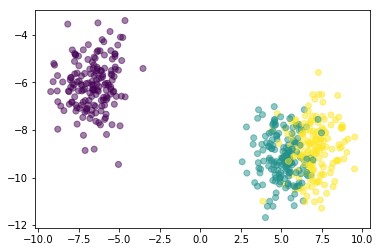

In [6]:
scatter(X[:,0], X[:,1], c=Y, alpha=0.5)

All of these clusters are Gaussian with isotropic covariance matrices ($\Sigma=\sigma^2 I$) and thay all have the same variance. This is the assumption of K-means, but K-means is still often used to initilaize density estimation when this is not the case. 

This is the pseudocode for K-means:


1. Let $K$ denote the number of clusters
2. Let $X$ denote the set of $N$ data points, each is an $M$-dimensional point. 
3. Set $\mu_1^{(0)}...\mu_k^{(0)}$ to $K$ randomly selected points from $X$
4. For $i=0, 1, 2, ...$ until convergence
5. &nbsp;&nbsp;&nbsp;&nbsp; 
      Set $d_{n,j}^{(i+1)} = ||X_n - \mu_j^{(i)}||^2$, the distance of each point to the j'th cluster center. 
6. &nbsp;&nbsp;&nbsp;&nbsp;  Set $c_n^{(i+1)}=\displaystyle{\arg\min_j d_{n,j}^{(i+1)}}$
7. &nbsp;&nbsp;&nbsp;&nbsp; 
      Set $\mu_c^{(i+1)} = \frac{\sum_{c_n=c} X_n }{\text{count}({c_n=c})}$
      
In order to test for convergence, you either test whether all $c_n^{(i+1)}=c_n^({i})$ or you can check whether $\sum_{c} \left(\mu_c^{(i+1)} - \mu_c^{(i)}\right)^2  < K\tau $ where $\tau$ is some tolerance parameter.  

Your first lab assignment is to implement k-means. My implementation is in `my_kmean` which I will load in the next cell. You can compare your results to mine. 
> NOTE: My implementation is not a perfect example of clear pythonic code, but you may look at it f you like.

In [7]:
%run -i my_kmeans

ERROR:root:File `u'my_kmeans.py'` not found.


In [70]:
# if an error happens and you want a debugger do this:
%pdb on
# or a breakpoint (add this to the line you want to have the breakpoint)
# http://kawahara.ca/how-to-debug-a-jupyter-ipython-notebook/
# from IPython.core.debugger import Tracer; Tracer()()

def kmeans(K, X, tolerance, mu_init=None, maxit=50):
    """ Do up to maxit iterations.
    Stop when the change is less than tolerance.
    Use mu_init to intialize mus, if it is None then randomly choose points
    Return cluster centetrs (mu), and cluster assignments (c)"""
    N = len(X)
    indices = np.random.choice(N, size = K)
    mu = mu_init if mu_init else X[indices]
    old_mu = 10 * K * tolerance + mu
    i = 0
    clusters = None
    print np.linalg.norm(mu-old_mu) < K * tolerance
    while (np.linalg.norm(mu-old_mu) < K * tolerance and i < maxit):                             
        d = np.zeros((N, K))
        c = np.zeros(K)
        for n in range(N):
            for j in range(K):
                d[n, j] = np.linalg.norm(X[n] - mu[j])
        clusters = argmin(d, axis=1)
        old_mu = mu
        for c in range(K):
            mu[c] = X[clusters == c].sum()/len(where(clusters == c))
        i+=1
    
    print clusters
    return mu, clusters

Automatic pdb calling has been turned ON


False
None


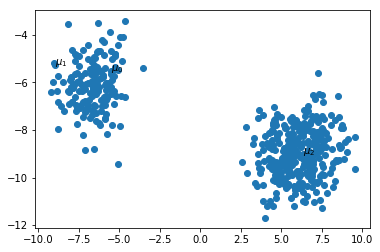

In [71]:
# mus, clusters = my_kmeans(3, X)
mus, clusters = kmeans(3, X, 0.05)
scatter(X[:,0], X[:,1], c=clusters)
for k in range(len(mus)):
    text(mus[k,0], mus[k,1], r'$\mu_{}$'.format(k))

# EM-GMM: Expectation Maximization for Guassians

NOTE: He didn't finish this part of the lab

In [98]:
from sklearn.datasets import make_classification

In [99]:
X, Y = make_classification(n_samples=100, 
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_classes=2, 
                           n_clusters_per_class=1)

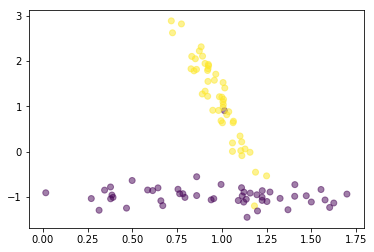

In [101]:
scatter(X[:,0], X[:,1], c=Y, alpha=0.5)

The EM GMM algorithm is similar to K-means, except that we use _soft_ memberships.
The probability $$p(x) = \sum_j w_j N(x | \mu_j, \Sigma_j)$$ and the weights $w_j$ can be interpreted as the probability that a sample $x$ is generated by cluster $j$. 

This means that for each sample we can estimate the probability that is came from the $j^{th}$ gaussian
$$ 
c_{n,j} = \frac{w_j N(X_n|\mu_j, \Sigma_j)} {\sum_k w_k N(X_n|\mu_k, \Sigma_k) }
$$
instead of $c_n$. 

Then, using this information,  at each iteration we update the $w_j, \mu_j, \Sigma_j$ parameters based on the weights:

$$ w'_j = $$
$$ \mu'_j = $$
$$ \sigma'_j = $$

and so at each iteration we alternate between calculating $c_{n,j}$ and than choosing $w, \mu, \Sigma$ based on those. The process can stop with the chang